### **FlexML:** Regression Experiment with California House Value Prediction Dataset

In [4]:
from flexml import Regression
from sklearn.datasets import fetch_california_housing

In [5]:
df = fetch_california_housing(as_frame = True)['frame']
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [3]:
reg_exp = Regression(data=df, target_col="MedHouseVal") # Configure your feature engineering pipeline here
reg_exp.start_experiment(experiment_size="quick") # Configure your experiment size and cross validation strategy here
# quick (default) (uses almost half amount of the available ml models), wide (Uses all available ml models)

INFO | 2025-03-15 21:44:06 | [PROCESS] Training the ML models with kfold validation
INFO | Training Progress:  | ██████████ | 100%
INFO | 2025-03-15 21:44:33 | [PROCESS] Model training is finished!


,Model Name,R2,MAE,MSE,RMSE,MAPE,Time Taken (sec)
1,CatBoostRegressor,0.852024,0.291575,0.196942,0.443684,0.162991,6.740000
2,LGBMRegressor,0.837282,0.309548,0.216548,0.465227,0.175458,2.190000
3,XGBRegressor,0.834695,0.307479,0.219990,0.468914,0.171952,1.620000
4,GradientBoostingRegressor,0.787666,0.367949,0.282626,0.531452,0.210559,12.480000
5,DecisionTreeRegressor,0.613782,0.459651,0.514159,0.717004,0.250717,0.600000
6,Ridge,0.601385,0.531686,0.530564,0.728245,0.317594,0.050000
7,LinearRegression,0.601378,0.531677,0.530572,0.728251,0.317588,0.010000
8,ElasticNet,0.422752,0.679422,0.768426,0.876568,0.453446,0.000000
9,Lasso,0.284865,0.767992,0.952078,0.975702,0.520122,0.800000
10,HuberRegressor,-2.172928,0.593039,4.229033,1.541407,0.346339,1.700000


In [6]:
reg_exp = Regression(data=df, target_col="MedHouseVal") # Configure your feature engineering pipeline here
reg_exp.start_experiment(experiment_size="quick") # Configure your experiment size and cross validation strategy here
# quick (default) (uses almost half amount of the available ml models), wide (Uses all available ml models)

INFO | 2025-03-15 22:10:50 | [PROCESS] Training the ML models with kfold validation
INFO | Training Progress:  | ██████████ | 100%
INFO | 2025-03-15 22:11:32 | [PROCESS] Model training is finished!


,Model Name,R2,MAE,MSE,RMSE,MAPE,Time Taken (sec)
1,CatBoostRegressor,0.852024,0.291575,0.196942,0.443684,0.162991,11.140000
2,LGBMRegressor,0.837282,0.309548,0.216548,0.465227,0.175458,3.800000
3,XGBRegressor,0.834695,0.307479,0.219990,0.468914,0.171952,2.690000
4,GradientBoostingRegressor,0.787666,0.367949,0.282626,0.531452,0.210559,15.440000
5,DecisionTreeRegressor,0.613782,0.459651,0.514159,0.717004,0.250717,0.800000
6,Ridge,0.601385,0.531686,0.530564,0.728245,0.317594,0.040000
7,LinearRegression,0.601378,0.531677,0.530572,0.728251,0.317588,0.010000
8,ElasticNet,0.422752,0.679422,0.768426,0.876568,0.453446,0.040000
9,Lasso,0.284865,0.767992,0.952078,0.975702,0.520122,1.240000
10,HuberRegressor,-2.172928,0.593039,4.229033,1.541407,0.346339,5.530000


In [4]:
# You can also display the model stats after the experiment is done with a desired evaluation metric, default is "r2"
reg_exp.show_model_stats(eval_metric="r2")

,Model Name,R2,MAE,MSE,RMSE,MAPE,Time Taken (sec)
1,CatBoostRegressor,0.852024,0.291575,0.196942,0.443684,0.162991,8.140000
2,LGBMRegressor,0.837282,0.309548,0.216548,0.465227,0.175458,2.450000
3,XGBRegressor,0.834695,0.307479,0.219990,0.468914,0.171952,1.770000
4,GradientBoostingRegressor,0.787666,0.367949,0.282626,0.531452,0.210559,13.820000
5,DecisionTreeRegressor,0.613782,0.459651,0.514159,0.717004,0.250717,0.670000
6,Ridge,0.601385,0.531686,0.530564,0.728245,0.317594,0.020000
7,LinearRegression,0.601378,0.531677,0.530572,0.728251,0.317588,0.030000
8,ElasticNet,0.422752,0.679422,0.768426,0.876568,0.453446,0.100000
9,Lasso,0.284865,0.767992,0.952078,0.975702,0.520122,0.790000
10,HuberRegressor,-2.172928,0.593039,4.229033,1.541407,0.346339,2.060000


In [5]:
"""
* You can get the best model(s) by calling get_best_models() method
    - top_n_models: default is 1, If you want to get only one model, you will get a model object, else
    - you will get a list of model objects
* By default, get_best_models() function returns the best model(s) based on the evaluation metric used in the start_experiment()
* But you can reorder the models by passing eval_metric parameter to get_best_models()
"""
best_model = reg_exp.get_best_models(top_n_models=1)

# Optionally, you can get the any model object by "model_name" value in the show_model_stats() output
example_model = reg_exp.get_model_by_name("CatBoostRegressor")

In [6]:
print(best_model)

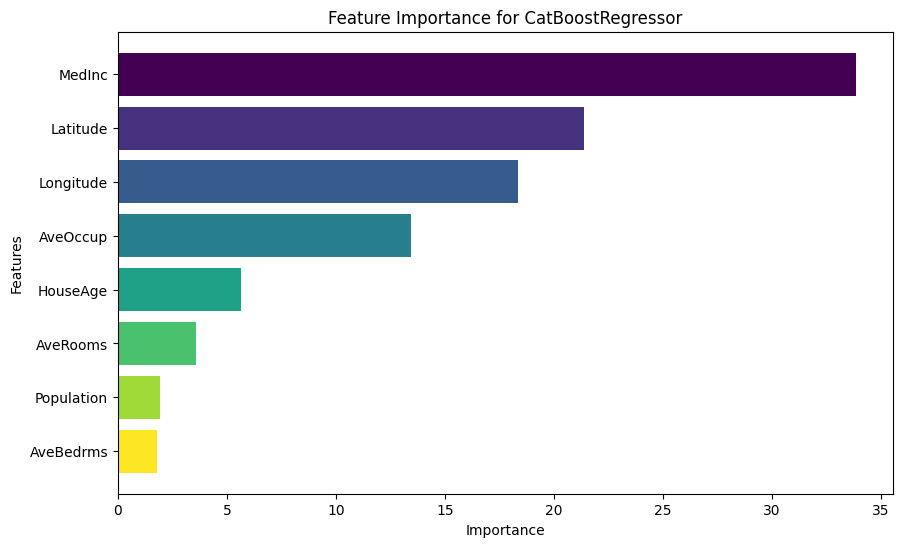

In [7]:
# Plot the feature importance of a model by passing the model object. Default is the best model found in the experiment
reg_exp.plot_feature_importance()

In [8]:
reg_exp.tune_model(tuning_method="optuna") # If you don't play with any cross-validation strategy here, It uses the same strategy as the start_experiment(), otherwise it cleans the model leaderboard since validation strategy is different

INFO | 2025-03-13 17:55:23 | [PROCESS] Model Tuning process started with 'optuna' method


,Model Name,R2,MAE,MSE,RMSE,MAPE,Time Taken (sec)
1,CatBoostRegressor_(optuna)_(n_iter=10),0.852571,0.288764,0.196183,0.442863,0.161167,23.660000
2,CatBoostRegressor,0.852024,0.291575,0.196942,0.443684,0.162991,8.140000
3,LGBMRegressor,0.837282,0.309548,0.216548,0.465227,0.175458,2.450000
4,XGBRegressor,0.834695,0.307479,0.219990,0.468914,0.171952,1.770000
5,GradientBoostingRegressor,0.787666,0.367949,0.282626,0.531452,0.210559,13.820000
6,DecisionTreeRegressor,0.613782,0.459651,0.514159,0.717004,0.250717,0.670000
7,Ridge,0.601385,0.531686,0.530564,0.728245,0.317594,0.020000
8,LinearRegression,0.601378,0.531677,0.530572,0.728251,0.317588,0.030000
9,ElasticNet,0.422752,0.679422,0.768426,0.876568,0.453446,0.100000
10,Lasso,0.284865,0.767992,0.952078,0.975702,0.520122,0.790000


INFO | 2025-03-13 17:55:47 | [PROCESS] Model Tuning process is finished successfully


In [9]:
reg_exp.tune_model(model="LGBMRegressor", tuning_method="randomized_search", n_iter=5)
# You are in your own world now, you can pass any model object and any tuning method you want and see all of them in the same model leaderboard for comparison

INFO | 2025-03-13 17:55:47 | [PROCESS] Model Tuning process started with 'randomized_search' method


,Model Name,R2,MAE,MSE,RMSE,MAPE,Time Taken (sec)
1,LGBMRegressor_(randomized_search)_(n_iter=5),0.855076,0.286317,0.192833,0.439004,0.159922,64.140000
2,CatBoostRegressor_(optuna)_(n_iter=10),0.852571,0.288764,0.196183,0.442863,0.161167,23.660000
3,CatBoostRegressor,0.852024,0.291575,0.196942,0.443684,0.162991,8.140000
4,LGBMRegressor,0.837282,0.309548,0.216548,0.465227,0.175458,2.450000
5,XGBRegressor,0.834695,0.307479,0.219990,0.468914,0.171952,1.770000
6,GradientBoostingRegressor,0.787666,0.367949,0.282626,0.531452,0.210559,13.820000
7,DecisionTreeRegressor,0.613782,0.459651,0.514159,0.717004,0.250717,0.670000
8,Ridge,0.601385,0.531686,0.530564,0.728245,0.317594,0.020000
9,LinearRegression,0.601378,0.531677,0.530572,0.728251,0.317588,0.030000
10,ElasticNet,0.422752,0.679422,0.768426,0.876568,0.453446,0.100000


INFO | 2025-03-13 17:56:51 | [PROCESS] Model Tuning process is finished successfully


In [11]:
# You can access to tuning model by using get_model_by_name() method

my_tuned_lgb_model = reg_exp.get_model_by_name("LGBMRegressor_(randomized_search)_(n_iter=5)")
my_tuned_lgb_model

LGBMRegressor(colsample_bytree=0.7, enable_categorical=True, max_depth=10,
              min_child_weight=5, n_estimators=300, num_leaves=50,
              random_state=42, reg_alpha=0, reg_lambda=0, subsample=0.7,
              verbose=-1)

## Prediction and Model Saving

In [12]:
# Let's assume that you have a new data for prediction, for example the same data that you used for training.

X = reg_exp.X

preds = reg_exp.predict(X) # full_train (default=True) param enables you to train the model with the whole dataset and then predict, otherwise it uses the model that trained with the last X_train, y_train fold
preds

INFO | 2025-03-13 17:57:29 | Training the model using the fully feature-engineered data


array([4.30071943, 3.85183199, 4.16394166, ..., 0.96663076, 0.89024036,
       0.86868   ])

In [13]:
reg_exp.save_model(my_tuned_lgb_model) # Saves the model with the feature engineering pipeline, you can set model_only to True If you want to save only the model

INFO | 2025-03-13 17:57:31 | No save path provided. Using default: pipeline.pkl
INFO | 2025-03-13 17:57:31 | Training the model using the fully feature-engineered data
INFO | 2025-03-13 17:57:33 | Pipeline saved successfully at pipeline.pkl


Pipeline(steps=[('imputer',
                 ColumnImputer(column_imputation_mapper={'AveBedrms': 'mean',
                                                         'AveOccup': 'mean',
                                                         'AveRooms': 'mean',
                                                         'HouseAge': 'mean',
                                                         'Latitude': 'mean',
                                                         'Longitude': 'mean',
                                                         'MedInc': 'mean',
                                                         'Population': 'mean'})),
                ('encoder',
                 CategoricalEncoder(encoding_method_mapper={}, ordinal_map={})),
                ('model',
                 LGBMRegressor(colsample_bytree=0.7, enable_categorical=True,
                               max_depth=10, min_child_weight=5,
                               n_estimators=300, num_leaves=50, random_state=42,
                               reg_alpha=0, reg_lambda=0, subsample=0.7,
                               verbose=-1))])